# Aula 3: séries temporais
**Objetivo da aula:** ao fim desta aula, o aluno será capaz de usar médias móveis, médias móveis exponenciais, medianas móveis e diferenciais no tempo para evidenciar características de séries temporais

* Fonte dos dados: https://portal.inmet.gov.br/dadoshistoricos

# Exercício 1
*Objetivo: entender como fazer um plot de dados usando o Seaborn*

No código abaixo, temos um exemplo sobre como criar um plot de linha mostrando a precipitação, por hora, ao longo de um ano em Brasília.

1. É possível visualizar as estações (chuvosa e seca) neste desenho? Por que?
1. As marcações do eixo X na figura são compreensíveis?
1. Quais outros elementos poderiam ajudar na compreensão da figura?

In [1]:
import pandas as pd

In [87]:
ano=2001
df = pd.read_csv('dados/INMET/'+str(ano)+'/INMET_CO_DF_A001_BRASILIA_01-01-'+str(ano)+'_A_31-12-'+str(ano)+'.CSV', sep=';', encoding='ansi', decimal=',', skiprows=8)
df.head()

,DATA (YYYY-MM-DD),HORA (UTC),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
0,2001-01-01,00:00,0.8,886.0,886.0,885.7,-9999,20.1,19.0,20.7,20.1,19.4,18.9,93,91,93,167,5.3,2.8,NaN
1,2001-01-01,01:00,3.4,886.1,886.1,886.0,-9999,19.8,19.0,20.0,19.7,19.1,18.9,96,94,95,187,4.0,0.3,NaN
2,2001-01-01,02:00,1.4,886.2,886.4,886.1,-9999,19.9,19.1,20.0,19.8,19.2,19.0,96,95,95,288,1.1,0.0,NaN
3,2001-01-01,03:00,0.0,885.8,886.3,885.8,-9999,19.8,19.0,20.0,19.7,19.1,18.5,95,93,95,346,0.9,0.2,NaN
4,2001-01-01,04:00,0.0,885.4,885.9,885.4,-9999,19.4,18.9,20.0,19.4,19.3,18.8,97,95,97,305,2.8,1.8,NaN


In [88]:
data = df[['DATA (YYYY-MM-DD)', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']]
#data.set_index('DATA (YYYY-MM-DD)')

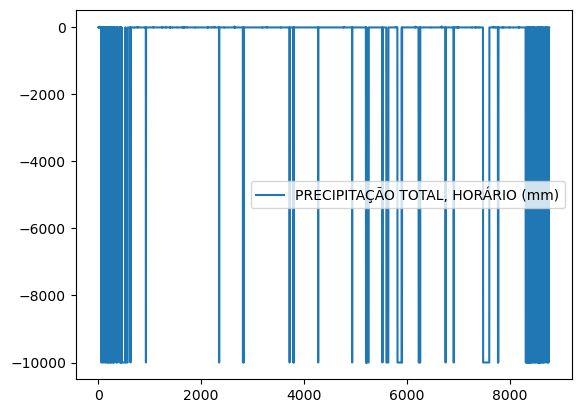

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
plt.figure()
sns.lineplot(data=data)
plt.show()

# Exercício 2
*Objetivo: entender como realizar limpeza de dados trocando valores inválidos por zeros*

O código abaixo troca todos os elementos inválidos por zeros.

1. Após a execução, qual é o conteúdo da variável `dado_invalido`?
1. Consulte a documentação do Pandas: para que serve a construção `df.loc`?
1. Agora, já conseguimos visualizar as estações chuvosa e seca?

In [90]:
dado_invalido = df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] < 0 # Importante: o fato de ser esse o critério é uma característica dos dados, e não uma característica geral!
df.loc[dado_invalido, 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] = 0
data = df[['DATA (YYYY-MM-DD)', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']]


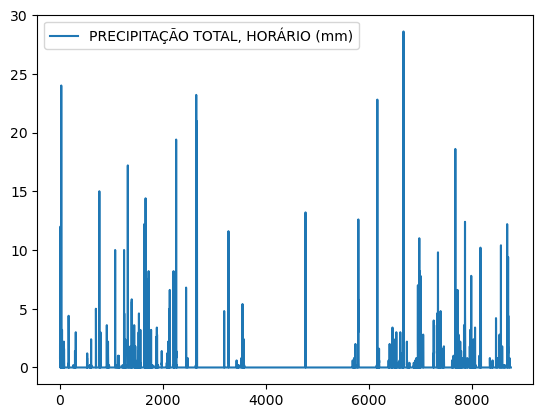

In [91]:
plt.figure()
sns.lineplot(data=data)
plt.show()

# Exercício 3
*Objetivo: agrupar dados em um dataframe para tornar sua visualização mais clara*

Em nossa visualização, pode ser mais claro (ao menos nesta aplicação) mostrarmos nossos dados se tivermos apenas um ponto por dia. Neste caso, faria sentido somar toda a precipitação em cada dia e então mostrá-la. O `Pandas` já nos fornece essa funcionalidade.

1. Analisando o código e a saída de `df_.head()`, veja que a coluna com um índice numérico desapareceu. Por que isso aconteceu?
1. Qual foi a diferença, neste código, na definição da variável `data`? Por que essa diferença aconteceu?
1. A existência de estações secas e chuvosas ficou mais clara nesta nova figura?

In [92]:
df_ = df.groupby('DATA (YYYY-MM-DD)')
df_ = df_.sum()
df_.head()


,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
DATA (YYYY-MM-DD),,,,,,,,,,,,,,,,,,
2001-01-01,34.0,21249.8,21255.8,21244.2,-85040,497.6,450.9,510.3,486.8,462.0,438.7,2206,2054,2138,7005,90.8,40.8,0.0
2001-01-02,28.4,21260.6,21265.3,21255.1,-84226,494.7,440.7,502.5,485.8,448.3,432.4,2151,2056,2098,7408,119.4,56.8,0.0
2001-01-03,0.4,-22260.4,-22253.9,-22265.3,-112332,-39552.0,-39640.2,-39542.0,-39559.6,-39630.7,-39651.1,-38396,-38518,-38450,-36411,-39890.3,-39940.7,0.0
2001-01-04,4.6,-11339.1,-11333.4,-11344.8,-99189,-29552.5,-29629.0,-29540.0,-29562.9,-29618.0,-29641.1,-28244,-28386,-28311,-27486,-29869.6,-29934.3,0.0
2001-01-05,0.0,-22236.5,-22230.0,-22239.2,-104082,-39540.4,-39653.4,-39530.1,-39549.7,-39642.0,-39664.0,-38485,-38602,-38542,-37893,-39862.9,-39926.7,0.0


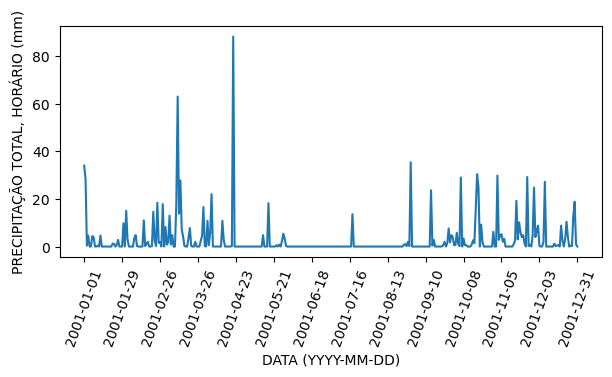

In [105]:
data = df_['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']
plt.figure(figsize=(7,3))
sns.lineplot(data=data)
plt.xticks(range(0, 365, 28), rotation=70)
plt.show()

# Exercício 4
*Objetivo: aplicar uma média móvel para visualizar tendências em figuras*

Como queremos visualizar estações chuvosas, e não dias chuvosos, faz sentido observarmos a precipitação média ao longo de alguns dias - afinal, alguns dias chovem, outros dias não chovem, e as chuvas da estação estão distribuídas ao longo de vários dias. Esse tipo de média funciona calculando a média dos últimos valores de cada série temporal.

O código abaixo cria uma nova coluna em `df_` contendo a média móvel da precipitação diária.

1. O que significa o parâmetro `window` no método `rolling`? O que significa o `center`?
1. Por que há alguns valores "not a number" (`NaN`) na nova coluna criada?
1. A nova figura gerada já permite visualizar tendências? Modifique os parâmetros do método `rolling` para melhorar a visualização.
1. Na figura gerada, estamos observando a *precipitação média* a cada estação. Modifique o código para observarmos a *precipitação em um dia médio de cada estação*.



In [106]:
df_['PRECIPITAÇÃO TOTAL, MÉDIA MÓVEL'] = df_['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].rolling(window=60,center=True).mean()
df_.head()

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19,"PRECIPITAÇÃO TOTAL, MÉDIA MÓVEL"
DATA (YYYY-MM-DD),,,,,,,,,,,,,,,,,,,
2001-01-01,34.0,21249.8,21255.8,21244.2,-85040,497.6,450.9,510.3,486.8,462.0,438.7,2206,2054,2138,7005,90.8,40.8,0.0,NaN
2001-01-02,28.4,21260.6,21265.3,21255.1,-84226,494.7,440.7,502.5,485.8,448.3,432.4,2151,2056,2098,7408,119.4,56.8,0.0,NaN
2001-01-03,0.4,-22260.4,-22253.9,-22265.3,-112332,-39552.0,-39640.2,-39542.0,-39559.6,-39630.7,-39651.1,-38396,-38518,-38450,-36411,-39890.3,-39940.7,0.0,NaN
2001-01-04,4.6,-11339.1,-11333.4,-11344.8,-99189,-29552.5,-29629.0,-29540.0,-29562.9,-29618.0,-29641.1,-28244,-28386,-28311,-27486,-29869.6,-29934.3,0.0,NaN
2001-01-05,0.0,-22236.5,-22230.0,-22239.2,-104082,-39540.4,-39653.4,-39530.1,-39549.7,-39642.0,-39664.0,-38485,-38602,-38542,-37893,-39862.9,-39926.7,0.0,NaN


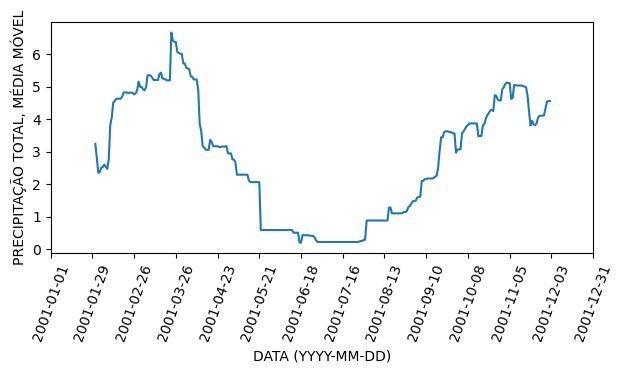

In [107]:
data = df_['PRECIPITAÇÃO TOTAL, MÉDIA MÓVEL']
plt.figure(figsize=(7,3))
sns.lineplot(data=data)
plt.xticks(range(0, 365, 28), rotation=70)
plt.show()

# Exercício 5
*Objetivo: aplicar a limpeza de dados em uma situação de dados tipo NaN*

No código abaixo, carregamos dados da estação metereológica de Brasília referentes a 2021.

1. Como os dados inválidos são mostrados, neste caso?
1. Procure nas documentações do `Pandas` como poderíamos limpar os dados, neste caso
1. Em 2021, observamos as mesmas estações (chuvosa e seca) que em 2001? Brasília ficou mais seca ou mais úmida?

In [108]:
ano=2021
df = pd.read_csv('dados/INMET/'+str(ano)+'/INMET_CO_DF_A001_BRASILIA_01-01-'+str(ano)+'_A_31-12-'+str(ano)+'.CSV', sep=';', encoding='ansi', decimal=',', skiprows=8)
df.head()

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
0,2021/01/01,0000 UTC,0.0,887.1,887.1,886.3,NaN,20.9,15.9,22.4,20.8,16.5,15.4,75.0,67.0,73.0,327.0,3.6,0.8,NaN
1,2021/01/01,0100 UTC,0.0,887.3,887.5,887.1,NaN,20.5,16.4,21.1,19.5,16.9,16.0,83.0,73.0,78.0,134.0,2.3,1.5,NaN
2,2021/01/01,0200 UTC,0.0,887.9,888.0,887.2,NaN,19.6,16.1,21.4,19.6,16.5,15.9,80.0,73.0,80.0,309.0,2.5,1.1,NaN
3,2021/01/01,0300 UTC,0.0,887.6,888.0,887.6,NaN,19.4,16.7,20.1,19.3,17.0,16.1,86.0,78.0,84.0,315.0,2.3,0.6,NaN
4,2021/01/01,0400 UTC,0.0,887.0,887.6,887.0,NaN,18.7,16.3,19.4,18.6,16.8,16.0,86.0,83.0,86.0,270.0,1.4,0.7,NaN


0       False
1       False
2       False
3       False
4       False
        ...  
8755    False
8756    False
8757    False
8758    False
8759    False
Name: PRECIPITAÇÃO TOTAL, HORÁRIO (mm), Length: 8760, dtype: bool


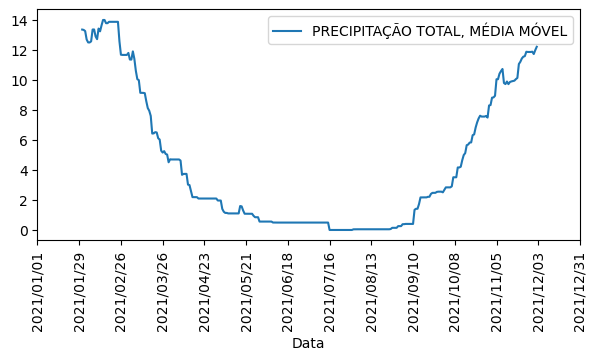

In [110]:
dado_invalido = pd.isnull(df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'])  # Importante: o fato de ser esse o critério é uma característica dos dados, e não uma característica geral!
print(dado_invalido)
df.loc[dado_invalido, 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] = 0
df_ = df.groupby('Data')
df_ = df_.sum()
df_.head()
df_['PRECIPITAÇÃO TOTAL, MÉDIA MÓVEL'] = df_['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].rolling(window=60,center=True).mean()
df_.head()
data = df_[['PRECIPITAÇÃO TOTAL, MÉDIA MÓVEL']]
plt.figure(figsize=(7,3))
sns.lineplot(data=data)
plt.xticks(range(0, 365, 28), rotation=90)
plt.show()


# Exercício 6
*Objetivo: concatenar séries temporais para visualizar tendências em longo prazo*

O código abaixo permite concatenar e visualizar a precipitação (por média móvel) durante dois anos.

1. O que a função `append` faz?
1. O que acontece com a figura se, ao invés de juntarmos as séries de 2001 e 2002, tentarmos juntar as séries de 2001 e 2021?
1. Verifique as colunas resultantes do `append` e encontre o motivo do problema ter acontecido.
1. Que função do Pandas permite "mudar o nome" de uma coluna? Aplique essa função para corrigir o problema encontrado acima!
1. Faça uma figura mostrando a série temporal de precipitações em Brasília de 2001 a 2021. É possível observar alguma tendência?

In [111]:
ano=2001
df = pd.read_csv('dados/INMET/'+str(ano)+'/INMET_CO_DF_A001_BRASILIA_01-01-'+str(ano)+'_A_31-12-'+str(ano)+'.CSV', sep=';', encoding='ansi', decimal=',', skiprows=8)
ano=2002
df2 = pd.read_csv('dados/INMET/'+str(ano)+'/INMET_CO_DF_A001_BRASILIA_01-01-'+str(ano)+'_A_31-12-'+str(ano)+'.CSV', sep=';', encoding='ansi', decimal=',', skiprows=8)
df = df.append(df2)

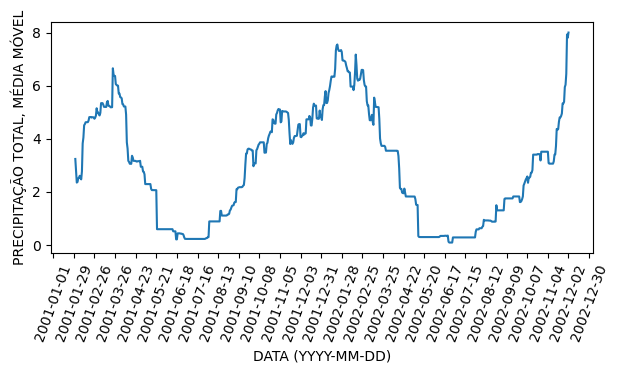

In [113]:
dado_invalido = df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] < 0 # Importante: o fato de ser esse o critério é uma característica dos dados, e não uma característica geral!
df.loc[dado_invalido, 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] = 0
df_ = df.groupby('DATA (YYYY-MM-DD)')
df_ = df_.sum()
df_['PRECIPITAÇÃO TOTAL, MÉDIA MÓVEL'] = df_['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].rolling(window=60,center=True).mean()
data = df_['PRECIPITAÇÃO TOTAL, MÉDIA MÓVEL']
plt.figure(figsize=(7,3))
sns.lineplot(data=data)
plt.xticks(range(0, len(data), 28), rotation=70)
plt.show()

4.294117647058823

# Exercício 7
*Objetivo: explorar a janela deslizante no contexto de trading de ações*

Uma aplicação muito comum para janelas deslizantes é guiar o *trading* de ações, da seguinte forma.

* Avaliamos o preço de fechamento de uma determinada ação a cada dia.
* Calculamos a média móvel do fechamento numa janela de 200 dias (M200).
* Calculamos a média móvel do fechamento numa janela de 50 dias (M50).
* Quando M50 cruza M200 de baixo para cima, então temos um "cruzamento dourado" (golden cross) e devemos comprar a ação.
* Quando M50 cruza M200 de cima para baixo, então temos um "cruzamento da morte" (death cross) e devemos vender a ação.

Referência: BROCK, W., LAKONISHOK, J., & LeBARON, B. (1992). Simple Technical Trading Rules and the Stochastic Properties of Stock Returns. The Journal of Finance, 47(5), 1731–1764. [doi:10.1111/j.1540-6261.1992.tb04681.x](https://doi.org/10.1111/j.1540-6261.1992.tb04681.x)

1. Considerando a ideia de que médias móveis com janela menor são "mais rápidas", e que preços de ações supostamente se comportam como tendências que mudam ao longo do tempo, qual é o raciocínio por trás da estratégia proposta?
2. Considere as ações da Petrobrás (PETR4), que estão em nosso material de aula. Se você tivesse um milhão de reais em 1/janeiro/2011 e tivesse aplicado o algoritmo proposto acima, quanto teria em 31/12/2020?


In [2]:
df = pd.read_csv('dados/Bolsa/PETR4.SA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-03-01,5.875,5.875,5.875,5.875,3.203312,2.382848e+10
1,2000-03-02,5.838,5.838,5.838,5.838,3.183138,2.405376e+10
2,2000-03-03,6.038,6.038,6.038,6.038,3.292186,1.321728e+10
3,2000-03-06,6.038,6.038,6.038,6.038,3.292186,0.000000e+00
4,2000-03-07,6.038,6.038,6.038,6.038,3.292186,0.000000e+00


# Exercício 8
*Objetivo: mostrar, em uma figura, semelhanças e diferenças entre séries temporais*

Os dados ambientais variam bastante de cidade para cidade, e isso é uma consequência dos climas diferentes que estão em diferentes regiões.

1. Navegue pela [base de dados do INMET](https://portal.inmet.gov.br/dadoshistoricos).
2. Baixe os dados e certifique-se de que eles estão completos o suficiente para responder à pergunta: "a estação chuvosa em Salvador coincide com a estação chuvosa em Brasília?"
3. Usando as técnicas que aprendemos hoje, faça uma figura que evidencie a resposta à sua pergunta.
4. Não esqueça de rotular eixos e colocar título na figura! No título, tanto a pergunta quanto a resposta devem ficar evidentes.
5. Submeta sua figura no Blackboard.
